# Исследование надежности заемщиков


**Описание проекта**

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**
*	`children` — количество детей в семье,
*	`days_employed` — общий трудовой стаж в днях,
*	`dob_years` — возраст клиента в годах,
*	`education` — уровень образования клиента,
*	`education_id` — идентификатор уровня образования,
*	`family_status` — семейное положение,
*	`family_status_id` — идентификатор семейного положения,
*	`gender` — пол клиента,
*	`income_type` — тип занятости,
*	`debt` — имел ли задолженность по возврату кредитов,
*	`total_income` — ежемесячный доход,
*	`purpose` — цель получения кредита.


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import seaborn

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Промежуточные выводы:**

Обнаружены пропуски в столбцах `days_employed` и `total_income`. Пропуски необходимо устранить на этапе предобработки данных.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

**Промежуточные выводы:**

_**На этапе предобработки данных проведены следующие изменения:**_


* устранены пропуски в столбцах `days_employed` и `total_income`,
* устранены аномальные значения в столбцах `days_employed` и `children`,
* изменен вещественный тип данных в столбце `total_income` на целочисленный,
* устранены дубликаты в столбце `education`,
* проведена категоризация по столбцам `total_income` и `purpose`.

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Произведем категоризацию заемщиков по количеству детей:
* 0 - бездетный,
* 1 - одиг ребенок,
* 2 - двое детей,
* \> 2 - многодетный.

In [22]:
# функция категоризации по количеству детей
def categorize_children(row):
    try:
        if row == 0:
            return 'бездетный'
        if row == 1:
            return 'один ребенок'
        if row == 2:
            return 'двое детей'
        if row > 2:
            return 'многодетный'
    except:
        return 'ошибка в данных'

In [23]:
# добавим в датасет столбец категории по количеству детей
data['children_category'] = data['children'].apply(categorize_children)

In [24]:
# проверяем результат
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category,children_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью,один ребенок
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем,один ребенок
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью,бездетный
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования,многодетный
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы,бездетный
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью,бездетный
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью,бездетный
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования,бездетный
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы,двое детей
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью,бездетный


Создадим сводную таблицу для анализа:

In [25]:
# создаем функцию для формирования сводных таблиц
def pivot_table_create(data, index_name):
    # создаем сводную таблицу
    pivot_table = data.pivot_table(index=index_name, columns='debt', values='children', aggfunc='count')
    # создаем столбцы not_debt (нет просроченной задолженности) и debt (есть просроченная задолженность)
    pivot_table.columns = ['no_overdue_debt', 'overdue_debt']
    # считаем долю заемщиков с просрочкой об общего количества заемщиков данной категории
    pivot_table['share_overdue_debt'] = pivot_table['overdue_debt'] / (pivot_table['overdue_debt'] + pivot_table['no_overdue_debt'])
    # переводим долю заемщиков в проценты
    pivot_table['share_overdue_debt'] = pivot_table['share_overdue_debt'].map('{:.1%}'.format)
    # сортируем по доле заемщиков с просрочкой по убыванию
    return pivot_table.sort_values(by='share_overdue_debt', ascending=False)

# создаем сводную таблицу
children_debt = pivot_table_create(data, 'children_category')
children_debt

,no_overdue_debt,overdue_debt,share_overdue_debt
children_category,,,
двое детей,1858,194,9.5%
один ребенок,4364,444,9.2%
многодетный,349,31,8.2%
бездетный,13028,1063,7.5%


Для наглядности выведем диаграмму зависимости:

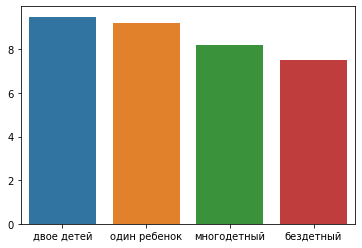

In [26]:
# создаем функцию построения диаграмм
def barplot_create(pivot_table, column, vertical=1):
    # принимает аргументы - сводная таблица, имя столбца, вид диаграммы
    if vertical == 1:
        # формируем список значений по горизонтали
        x_axis=pivot_table.index.values
        # формируем список значений по вертикали
        y_axis=[float(x.strip('%')) for x in list(pivot_table[column].values)]
    else:
        # формируем список значений по горизонтали
        x_axis=[float(x.strip('%')) for x in list(pivot_table[column].values)]
        # формируем список значений по вертикали
        y_axis=pivot_table.index.values
    # выводим диаграмму
    seaborn.barplot(x=x_axis, y=y_axis)
# вызываем функцию
barplot_create(children_debt, 'share_overdue_debt', vertical=1)

**Вывод:** 

_**Наличие просроченной задолженности зависит от количества детей.**_

* Самая низкая доля заемщиков с просроченной задолженностью среди бездетных заемщиков - 7.5%.
* Самая высокая доля заемщиков с просроченной задолженностью среди заемщиков с двумя детьми - 9.5%.
* Немного ниже доля заемщиков с просроченной задолженностью среди заемщиков с одним ребенком - 9.2%.
* Среди многодетных заемщиков доля заемщиков с просроченной задолженностью - 8.2%.

Таким образом, можно предположить, что расходы заемщика на детей повышают риск возникновения просроченной задолженности. По заемщикам с 0-2 детьми: чем больше детей, тем выше процент заемщиков с просроченной задолженностью.

_Данных по многодетным заемщикам недостаточно для корректных выводов по ним (380 заемщиков или 2% от выборки)._

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Для проведения анализа создадим сводную таблицу по семейному положению заемщиков:

In [27]:
# создаем сводную таблицу
family_status_debt = pivot_table_create(data, 'family_status')
family_status_debt

,no_overdue_debt,overdue_debt,share_overdue_debt
family_status,,,
Не женат / не замужем,2523,273,9.8%
гражданский брак,3749,385,9.3%
женат / замужем,11334,927,7.6%
в разводе,1105,84,7.1%
вдовец / вдова,888,63,6.6%


Для наглядности выведем диаграмму зависимости:

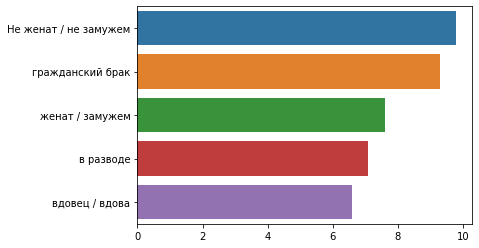

In [28]:
# выводим диаграмму
barplot_create(family_status_debt, 'share_overdue_debt', vertical=0)

**Вывод:** 

_**Наличие просроченной задолженности зависит от семейного положения.**_

* Самые высокие доли заемщиков с просроченной задолженностью среди холостых заемщиков (9.8%) и заемщиков живущих в гражданском браке (9.3%). _Вероятно, что отсутствие финансовых обязательств перед семьей негативно влияет на платежную дисциплину заемщиков данных категорий._
* Женатые или разведенные заемщики реже допускают просроченную задоленность (7.6% и 7.1% соответственно). 
* Самая низкая доля заемщиков с просроченной задолженностью среди овдовевших заемщиков - 6.6%.  _Вероятно, что их материальное положение несколько лучше, чем у других категорий заемщиков в связи с полученным наследством._

В целом следует отметить, что заемщики, побывавшие в официальном браке, наиболее надежны. Возможно, есть связь 
с их возрастом.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Ранее в анализе мы провели категоризацию заемщиков по уровню дохода по следующему принципу:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Сформируем сводную таблицу по указанным категориям:

In [29]:
# создаем сводную таблицу
total_income_debt = pivot_table_create(data, 'total_income_category')
total_income_debt

,no_overdue_debt,overdue_debt,share_overdue_debt
total_income_category,,,
E,20,2,9.1%
C,14568,1353,8.5%
A,23,2,8.0%
B,4660,354,7.1%
D,328,21,6.0%


Для наглядности выведем диаграмму зависимости:

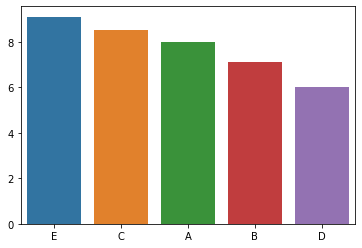

In [30]:
# выводим диаграмму
barplot_create(total_income_debt, 'share_overdue_debt', vertical=1)

**Вывод:**

_**Наличие просроченной задолженности зависит от уровня дохода.**_

* Заемщики со средним доходом (категория 'C') чаще допускают просроченную задолженность - 8.5%.
* Заемщики с доходом выше среднего (категория 'B') реже допускают просроченную задолженность - 7.1%.
_Вероятно, что категория 'B' имеет более высокую платежеспособность._

_По категориям 'A', 'D' и 'E' данных недостаточно для корректных выводов, возможна большая статистическая погрешность._

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Ранее в анализе мы провели категоризацию заемщиков по цели кредитования по следующеим целям:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Сформируем сводную таблицу по указанным категориям:

In [31]:
# создаем сводную таблицу
purpose_debt = pivot_table_create(data, 'purpose_category')
purpose_debt

,no_overdue_debt,overdue_debt,share_overdue_debt
purpose_category,,,
операции с автомобилем,3879,400,9.3%
получение образования,3619,369,9.3%
проведение свадьбы,2130,183,7.9%
операции с недвижимостью,9971,780,7.3%


Для наглядности выведем диаграмму зависимости:

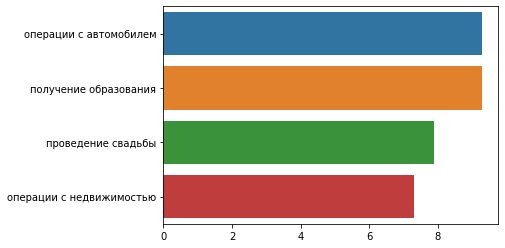

In [32]:
# выводим диаграмму
barplot_create(purpose_debt, 'share_overdue_debt', vertical=0)

**Вывод:** 

_**Наличие просроченной задолженности зависит от цели кредитования.**_

* Наиболее высокие доли заемщиков с просроченной задолженностью среди заемщиков, которые взяли кредиты на получение образования и операции с автомобилем  - по 9.3%. _Вероятно, что это связано с более высокой кредитной ставкой и короткими сроками уплаты кредита по данным видам кредитования._
* Наиболее низкая доля заемщиков с просроченной задолженностью среди заемщиков, которые взяли кредиты на операции с недвижимостью  - 7.3%. _Вероятно, что это связано с меньшей кредитной ставкой и длительными сроками уплаты кредита по данному виду кредитования, а также более высокой ответсвенностью заемщиков из-за риска потери недвижимости в случае неуплаты кредита._
* Доля заемщиков с просроченной задолженностью среди заемщиков, которые взяли кредиты на проведение свадьбы, относительно невысокая - 7.9%. _Вероятно, что это связано с получением дополнительного источника погашения кредита за счет свадебных подарков._

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*

возможными причинами появления пропусков в исходных данных могут являться:

* ошибки при вводе данных пользователями,
* клиенты могли не предоставить данные (возможно, что эту информацию не требуют в некоторых случаях), 
* умышленное искажение или сокрытие информации,
* программно-аппаратные сбои,
* технологические ошибки (проблемы на этапах загрузки/выгрузки данных, неправильные запросы к данным, некорректное объединение таблиц).


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

медианное значение является наиболее устойчивым показателем к выбросам в данных.

### Шаг 4: общий вывод.

В ходе выполнения проекта была проведена предобработка представленной банком статистики о платёжеспособности клиентов, а также анализ надежности заемщиков о влиянии:
* количества детей,
* семейного положения, 
* уровня дохода
* цели кредитования 

на факт погашения кредита в срок.

_**На основании проведенного анализа надёжности заёмщиков можно сделать следующие выводы:**_

* Самая низкая доля заемщиков с просроченной задолженностью среди бездетных заемщиков - 7.5%.
* Самая высокая доля заемщиков с просроченной задолженностью среди заемщиков с двумя детьми - 9.5%.
* Самые высокие доли заемщиков с просроченной задолженностью среди холостых заемщиков (9.8%) и заемщиков живущих в гражданском браке (9.3%).
* Самая низкая доля заемщиков с просроченной задолженностью среди овдовевших заемщиков - 6.6%.
* Заемщики со средним доходом (категория 'C') чаще допускают просроченную задолженность - 8.5%.
* Заемщики с доходом выше среднего (категория 'B') реже допускают просроченную задолженность - 7.1%.
* Наиболее высокие доли заемщиков с просроченной задолженностью среди заемщиков, которые взяли кредиты на получение образования и операции с автомобилем  - по 9.3%.
* Наиболее низкая доля заемщиков с просроченной задолженностью среди заемщиков, которые взяли кредиты на операции с недвижимостью  - 7.3%.

_**По итогам анализа целесообразно дать следующие рекомендации заказчику:**_

* увеличить объемы кредитования операций с недвижимостью,
* при принятии решений о кредитовании отдавать преимущество бездетным заемщикам состоящим/состоявшим в официальным браке и имеющим уровень дохода выше среднего.

**По дополнительным вопросам:**

1. Возможными причинами появления пропусков в исходных данных могут являться:

* ошибки при вводе данных пользователями,
* клиенты могли не предоставить данные (возможно, что эту информацию не требуют в некоторых случаях), 
* умышленное искажение или сокрытие информации,
* программно-аппаратные сбои,
* технологические ошибки (проблемы на этапах загрузки/выгрузки данных, неправильные запросы к данным, некорректное объединение таблиц).

2. Заполнение пропусков медианным значением является лучшим решением для количественных переменных потому, что медианное значение является наиболее устойчивым показателем к выбросам в данных.